# Kmeans Clustering Amazon Food Reviews

In [1]:
# Importing the libraries required to process the data

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

# Objective: Our objective is to find the optimal number of clusters using different methods such as K-means 

In [2]:
# Importing the required sqlite version of the Amazon Food Reviews dataset

# Establishing a connection with the database
con = sqlite3.connect('database.sqlite')

# Storing the data in a dataframe acquired from the connection

reviews_data = pd.read_sql_query("""SELECT * FROM Reviews""", con) 

In [3]:
# Checking the first few rows of the data to ensure whether we have the right data

reviews_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
# Checking the last few rows of the data to ensure we have the right data

reviews_data.tail(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [5]:
'''
For further processing and obtaining the number of clusters required we shall require only the text data, therefore we 
will extract only the text variable from the dataset.
'''

text_data = reviews_data[['Text']]


In [6]:
# Taking a look at the first few rows of the data to ensure that we have the right data

text_data.head(10)

# We can say that we have the right data

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
5,I got a wild hair for taffy and ordered this f...
6,This saltwater taffy had great flavors and was...
7,This taffy is so good. It is very soft and ch...
8,Right now I'm mostly just sprouting this so my...
9,This is a very healthy dog food. Good for thei...


In [7]:
# Let us look at the shape of the data

text_data.shape

# The data has 568454 rows and 1 column

(568454, 1)

In [8]:
# Now we will perform the data cleaning and transformation 

# We can see that there are unknown elements like html tags in the data. We need to remove those

# find sentences containing HTML tags

import re

i=0;
for sent in text_data['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1; 
    
# We can see that there is data consisting of html tags, we need to remove these tags

10
I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [9]:
'''
We will perform the data cleaning steps on the text data.For that we will perform word stemmatization and 
cleaning html and punctuation marks.
'''

#import re
'''import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer'''

nltk.download('stopwords')

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kulkarni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Applying the stopwords removal, html removal, punctuation marks removal on the text_data dataframe

#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
#all_positive_words=[] # store words from +ve reviews here
#all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in text_data['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    #if (final['Score'].values)[i] == 'positive': 
                    #    all_positive_words.append(s) #list of all words used to describe positive reviews
                    #if(final['Score'].values)[i] == 'negative':
                    #    all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1


In [11]:
# Assigning the 'final_string' array to the 'text_data' dataframe

text_data['Cleaned_Text'] = final_string

C:\Users\kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Checking whether the cleaned text has been assigned to the text_data dataframe

text_data.head()

# We can see that the data has been assigned to the dataframe

,Text,Cleaned_Text
0,I have bought several of the Vitality canned d...,b'bought sever vital can dog food product foun...
1,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...
2,This is a confection that has been around a fe...,b'confect around centuri light pillowi citrus ...
3,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...
4,Great taffy at a great price. There was a wid...,b'great taffi great price wide assort yummi ta...


In [13]:
# Checking the last few rows of the dataframe

text_data.tail()

# We can say that we have the right data after cleaning the text

,Text,Cleaned_Text
568449,Great for sesame chicken..this is a good if no...,b'great sesam chicken good better restur eaten...
568450,I'm disappointed with the flavor. The chocolat...,b'disappoint flavor chocol note especi weak mi...
568451,"These stars are small, so you can give 10-15 o...",b'star small give one train session tri train ...
568452,These are the BEST treats for training and rew...,b'best treat train reward dog good groom lower...
568453,"I am very satisfied ,product is as advertised,...",b'satisfi product advertis use cereal raw vine...


In [14]:
# Let us once check the dimensions of the dataframe just to be sure

text_data.shape

(568454, 2)

In [15]:
# We will only take the cleaned version of the text and make a new dataframe

final_text = text_data[['Cleaned_Text']].copy()

In [16]:
# Checking the first few rows of the data

final_text.head()

,Cleaned_Text
0,b'bought sever vital can dog food product foun...
1,b'product arriv label jumbo salt peanut peanut...
2,b'confect around centuri light pillowi citrus ...
3,b'look secret ingredi robitussin believ found ...
4,b'great taffi great price wide assort yummi ta...


In [17]:
final_text.shape

(568454, 1)

In [ ]:
'''
We are going to apply clustering on BoW, TF-IDF, Avg W2Vec and TF-IDF Weighted W2Vec, therefore we need to create models
for that.
''' 


In [18]:
'''
Creating clusters for 580k+ reviews was taking a lot of time, it was running for more than two hours w/ no result
Hence, I will select 100000 rows to make the clusters by selecting the mentioned points randomly.

'''

# Randomly selecting 2000 reviews of the given positive reviews

import random

n = 568454
m = 100000
p = m/n

final_reviews = [];

for i in range(0,n):
    if random.random() <= p:
        final_reviews.append(final_text[i,:])



TypeError: unhashable type: 'slice'

In [19]:
# We are getting the 'unhashable type: 'slice'' error

X1 = final_text.iloc[:,:].values

In [20]:
n = 568454
m = 100000
p = m/n

sample_reviews = [];

for i in range(0,n):
    if random.random() <= p:
        sample_reviews.append(X1[i,:])

In [21]:
print(sample_reviews)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
final_reviews = pd.DataFrame(sample_reviews)

In [23]:
# Checking the first few rows

final_reviews.head()

,0
0,b'confect around centuri light pillowi citrus ...
1,b'great taffi great price wide assort yummi ta...
2,b'candi deliv fast purchas reason price home b...
3,b'got mum diabet need watch sugar intak father...
4,b'celiac diseas product lifesav could better g...


In [24]:
final_reviews.columns = ['Cleaned_Text']

In [25]:
final_reviews.head()

,Cleaned_Text
0,b'confect around centuri light pillowi citrus ...
1,b'great taffi great price wide assort yummi ta...
2,b'candi deliv fast purchas reason price home b...
3,b'got mum diabet need watch sugar intak father...
4,b'celiac diseas product lifesav could better g...


In [26]:
final_reviews.shape

(100283, 1)

# Creating Bag of Words models and applying Kmeans

In [33]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final_reviews['Cleaned_Text'].values)


In [34]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( final_counts )
    cluster_errors.append( clusters.inertia_ )

In [35]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [36]:
clusters_df[0:10]

,cluster_errors,num_clusters
0,6.351156e+06,1
1,6.192715e+06,2
2,6.099702e+06,3
3,6.016027e+06,4
4,5.939023e+06,5
5,5.893230e+06,6
6,5.856884e+06,7
7,5.821833e+06,8
8,5.789096e+06,9
9,5.759574e+06,10


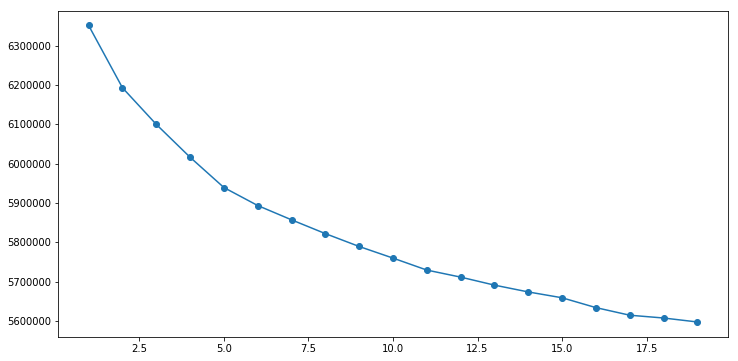

In [37]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o", )
plt.title('Cluster vs Error plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

# From the above plot we can see that until cluster 5 the rate of reduction in errors is quite high, whereas after the 5th cluster the rate of error reduction reduced significantly for the 100000 reviews which we have taken. Thus we can say from the plot that we get 5 as the optimum number of clusters for our review data using BoW representation of the text data.

# Creating TF-IDF model and applying Kmeans

In [54]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(final_reviews['Cleaned_Text'].values)


In [41]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( final_tf_idf )
    cluster_errors.append( clusters.inertia_ )

In [42]:
clusters_df_tfidf = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [43]:
clusters_df_tfidf[0:10]

,cluster_errors,num_clusters
0,97142.086591,1
1,96367.860981,2
2,95639.808105,3
3,95092.337060,4
4,94791.660825,5
5,94568.877519,6
6,94237.825899,7
7,94078.745220,8
8,93797.130855,9
9,93524.230611,10


Text(0,0.5,'Error')

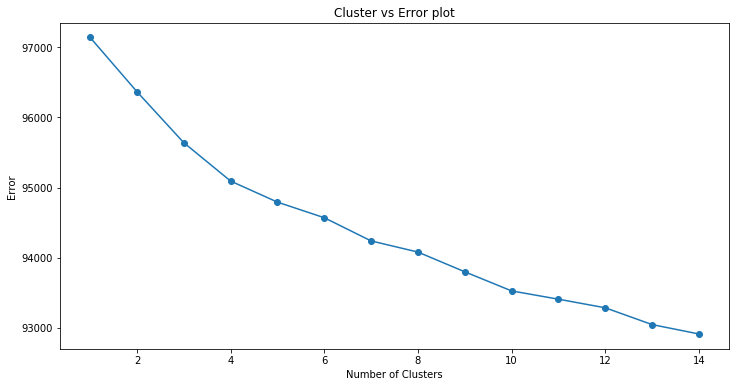

In [45]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df_tfidf.num_clusters, clusters_df_tfidf.cluster_errors, marker = "o" )
plt.title('Cluster vs Error plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

# From the above plot we can see that until cluster 5 the rate of reduction in errors is quite high, whereas after the 5th cluster the rate of error reduction reduced significantly for the 100000 reviews which we have taken. Thus we can say from the plot that we get 5 as the optimum number of clusters for our review data using Tf-Idf representation of the text data.

# We have found 5 to be the optimum number of clusters, we will apply kmeans w/ 5 as the number of clusters to get further insights.

In [46]:
# Applying the Kmeans w/ 5 clusters to the tf-idf representation of the text data

clusters_tfidf = KMeans(5)
clusters_tfidf.fit( final_tf_idf )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
final_reviews['Cluster_Id'] = clusters_tfidf.labels_

In [48]:
final_reviews.head(5)

# We can see that different reviews have been assigned by different cluster points 

,Cleaned_Text,Cluster_Id
0,b'product arriv label jumbo salt peanut peanut...,3
1,b'look secret ingredi robitussin believ found ...,3
2,b'right most sprout cat eat grass love rotat a...,0
3,b'daughter love twizzler shipment six pound re...,3
4,b'love eat good watch look movi sweet like tra...,3


In [57]:
# We will look at the different reviews in the different clusters 

df_0 = final_reviews.loc[final_reviews['Cluster_Id'] == 0]
df_0['Cleaned_Text'].head(15)

2      b'right most sprout cat eat grass love rotat a...
21     b'one cat allerg fish beef formula one eat muc...
36     b'start cat felida platinum week ago love shes...
185    b'cat love food glad see amazon carri local st...
186    b'purchas pound bag live daili essenti month d...
480    b'age cat sensit stomach cannot eat cat food a...
482    b'review make sound realli stupid whatev dont ...
483    b'although seem like great product definit min...
484    b'review make sound realli stupid whatev dont ...
828    b'research compani research ingredi custom ser...
897    b'cat occasion need littl green diet whole lot...
898    b'recent adopt new kitten rotat felida can for...
899    b'realli hope grain free can cat food work loo...
900    b'first cat love food one issu past need care ...
901    b'wonder ingredi list pea whole dont mush seve...
Name: Cleaned_Text, dtype: object

In [53]:
df_1 = final_reviews.loc[final_reviews['Cluster_Id'] == 1]
df_1.head(15)

,Cleaned_Text,Cluster_Id
12,b'roast home popcorn popper outsid cours bean ...,1
54,b'brand coffe avail local store time ive belie...,1
58,b'yes cup right went town look coffe invit non...,1
64,b'one green mountain best blend coffe opinion ...,1
107,b'make coffe creamer part commerci coffe cream...,1
151,b'true seattl coffe addict never better coffe ...,1
158,b'cant kind coffe maker work forc buy coffe sh...,1
231,b'first tast coffe hotel coffe shop costa rica...,1
239,b'use senseo decaffein coffe pod pack hamilton...,1
373,b'final new varieti tassimo drink everyth star...,1


In [54]:
df_2 = final_reviews.loc[final_reviews['Cluster_Id'] == 2]
df_2.head(15)

,Cleaned_Text,Cluster_Id
38,b'friend whod drink tea year introduc tea mont...,2
40,b'black tea everyday done past year habit mine...,2
106,b'tea tin guard aroma well tast malva flower s...,2
110,b'dinner friend famili saloon rte entertain co...,2
121,b'kind tea good tast smell wear like tea feel ...,2
129,b'hard ever write review tea quit excel decid ...,2
139,b'look exot tea drink experi like white jasmin...,2
140,b'first ball work pretti well look littl beate...,2
152,b'order receiv day tea excel price right',2
163,b'dont usual drink tea love one thought ship p...,2


In [55]:
df_3 = final_reviews.loc[final_reviews['Cluster_Id'] == 3]
df_3.head(15)

,Cleaned_Text,Cluster_Id
0,b'product arriv label jumbo salt peanut peanut...,3
1,b'look secret ingredi robitussin believ found ...,3
3,b'daughter love twizzler shipment six pound re...,3
4,b'love eat good watch look movi sweet like tra...,3
5,b'satisfi twizzler purchas share other enjoy d...,3
6,b'rememb buy candi kid qualiti hasnt drop year...,3
7,b'instant oatmeal becom soggi minut water hit ...,3
8,b'mccann instant irish oatmeal varieti pack re...,3
9,b'els need know oatmeal instant make half cup ...,3
10,b'seem littl wholesom supermarket brand somewh...,3


In [56]:
df_4 = final_reviews.loc[final_reviews['Cluster_Id'] == 4]
df_4.head(15)

,Cleaned_Text,Cluster_Id
16,b'great food love idea one food age breed \xc3...,4
17,b'year old basenji jack russel mix love dog fo...,4
127,b'royal canin recommend dog sinc line dog food...,4
128,b'bought one year old cocker howev dog love co...,4
205,b'four dog love stuff bite size treat perfect ...,4
206,b'ultim treat dog size dog absolut crazi liver...,4
245,b'year old portugues water dog alway seem sens...,4
246,b'heavi groceri bag ive order first bag harmon...,4
247,b'order came today thought would tri well amaz...,4
248,b'purchas harmoni farm healthi weight formula ...,4


# Creating AvgW2Vec representation of the text reviews and applying Kmeans

In [27]:
# Importing the required models for the project

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

C:\Users\kulkarni\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [29]:
X2 = text_data.iloc[:,:].values

In [30]:
n = 568454
m = 100000
p = m/n

text_data_sample = [];

for i in range(0,n):
    if random.random() <= p:
        text_data_sample.append(X2[i,:])

In [31]:
text_sample = pd.DataFrame(text_data_sample)

In [32]:
text_sample.head()

,0,1
0,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...
1,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...
2,I got a wild hair for taffy and ordered this f...,b'got wild hair taffi order five pound bag taf...
3,good flavor! these came securely packed... the...,b'good flavor came secur pack fresh delici lov...
4,I love eating them and they are good for watch...,b'love eat good watch look movi sweet like tra...


In [33]:
text_sample.shape

(99159, 2)

In [34]:
text_sample.columns = ['Text','Cleaned_Text']

In [35]:
text_sample.head(5)

,Text,Cleaned_Text
0,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...
1,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...
2,I got a wild hair for taffy and ordered this f...,b'got wild hair taffi order five pound bag taf...
3,good flavor! these came securely packed... the...,b'good flavor came secur pack fresh delici lov...
4,I love eating them and they are good for watch...,b'love eat good watch look movi sweet like tra...


In [36]:
import gensim
i=0
list_of_sent=[]
for sent in text_sample['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

In [37]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=3)

In [38]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

99159
50


In [39]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( sent_vectors )
    cluster_errors.append( clusters.inertia_ )

In [40]:
clusters_df_avgw2vec = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [42]:
clusters_df_avgw2vec[0:10]

,cluster_errors,num_clusters
0,654016.174269,1
1,585426.033212,2
2,551772.055366,3
3,523663.497412,4
4,503466.599312,5
5,491699.875403,6
6,482378.733844,7
7,474841.860849,8
8,468363.545772,9
9,462460.489949,10


Text(0,0.5,'Error')

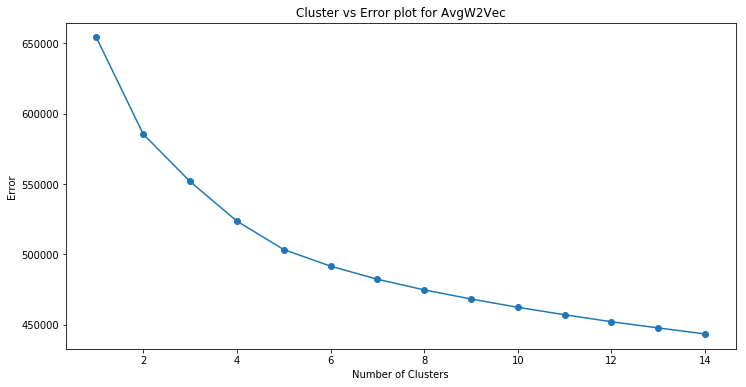

In [43]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df_avgw2vec.num_clusters, clusters_df_avgw2vec.cluster_errors, marker = "o" )
plt.title('Cluster vs Error plot for AvgW2Vec')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

# From the above plot we can see that until cluster 5 the rate of reduction in errors is quite high, whereas after the 5th cluster the rate of error reduction reduced significantly for the 100000 reviews which we have taken. Thus we can say from the plot that we get 5 as the optimum number of clusters for our review data using Average W2Vec representation of the text data.

# We have found 5 to be the optimum number of clusters, we will apply kmeans w/ 5 as the number of clusters to get further insights.

In [44]:
# Applying the Kmeans w/ 5 clusters to the tf-idf representation of the text data

clusters_avgw2vec = KMeans(5)
clusters_avgw2vec.fit( sent_vectors )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
text_sample['Cluster_Id'] = clusters_avgw2vec.labels_

In [46]:
text_sample.head()

,Text,Cleaned_Text,Cluster_Id
0,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...,4
1,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...,1
2,I got a wild hair for taffy and ordered this f...,b'got wild hair taffi order five pound bag taf...,4
3,good flavor! these came securely packed... the...,b'good flavor came secur pack fresh delici lov...,2
4,I love eating them and they are good for watch...,b'love eat good watch look movi sweet like tra...,2


In [48]:
# We will look at the different reviews in the different clusters 

df_0_aw2vec = text_sample.loc[text_sample['Cluster_Id'] == 0]
df_0_aw2vec['Text'].head(15)

16     I have a 4 year old male cat who has chronic u...
17     My holistic vet recommended this, along with a...
18     Our cats thrive extremely well on this dry cat...
37     Too much of a good thing? We worked this kibbl...
38     As with canidae, Felidae has also changed thei...
46     Five minutes in, one tentacle was bitten off, ...
51     A great healthy chew for my 9 wk old beagle, R...
60     I love, love, love the idea of this product an...
130    My father could no longer take care of his bel...
131    I tired many different dog foods over the 3 yr...
132    I bought this for my one year old Cocker. Howe...
146    My daughter had extensive food allergies as an...
152    I like the Earth's Best baby food line because...
153    I have twin girls, they both loved the Vegetab...
156    For whatever reason, our son really likes this...
Name: Text, dtype: object

In [49]:
df_1_aw2vec = text_sample.loc[text_sample['Cluster_Id'] == 1]
df_1_aw2vec['Text'].head(15)

1     If you are looking for the secret ingredient i...
7     McCann's Instant Irish Oatmeal, Variety Pack o...
8     What else do you need to know? Oatmeal, instan...
19    I've been a fan of Hot & Spicy Maruchan Ramen ...
25    Used this in Moroccan recipes, as a syrup in a...
27    I used to love these growing up and stopped dr...
29    This is not as good as the Frozen Lemon juice,...
30    Couldn't believe it when told how relaxing thi...
31    This  is great stuff.  Made some really tasty ...
32    Tastes great, and gives me energy without the ...
33    Pros:<br />+packaging, shipping, price<br />+s...
40    I've tried a variety of Ahmad tea. Not because...
41    I think I have tried just about every Bloody M...
43    The taste of these white cheddar flat breads i...
48    Yes, it's probably healthier than 5-Hour Energ...
Name: Text, dtype: object

In [50]:
df_2_aw2vec = text_sample.loc[text_sample['Cluster_Id'] == 2]
df_2_aw2vec['Text'].head(15)

3     good flavor! these came securely packed... the...
4     I love eating them and they are good for watch...
6     I got this for my Mum who is not diabetic but ...
11    These Albanese gummi bears and rings and so on...
12    Grape gummy bears are hard to find in my area....
14    These taste really good. I have been purchasin...
22    If you are looking for a less messy version of...
24    these are the best tasting tuna pack they make...
35    Even with small containers, they don't fill th...
36    To me, these are nothing like the regular Alto...
45    The pork chops from Omaha Steaks were very tas...
49    These Nature Valley Nut Lovers Variety Pack wa...
67    Great if you are cutting back on fat, they do ...
68    Now, I haven't done a side-by-side comparison,...
69    These are my favorite gluten-free dairy-free f...
Name: Text, dtype: object

In [51]:
df_3_aw2vec = text_sample.loc[text_sample['Cluster_Id'] == 3]
df_3_aw2vec['Text'].head(15)

39     I drink this tea plain (without sugar or milk)...
42     I'm trying several of the Wu Yi teas. I like t...
44     Hi, I have to have black tea everyday. I have ...
59     I purchased these coffee mate singles to use a...
64     This is one of the best mint chocolate syrup I...
82     Just got this order and it is ok. A bit light ...
122    This is the most delicious soy sauce I have ev...
123    Of all the coffee's available for Tassimo this...
137    This tea has surpassed all other breakfast tea...
138    It always amazes me that there are not dozens ...
164    I live in the dorms without a kitchen so makin...
181    I love this tea!! It is so flavorful yet there...
199    Expensive, but worth it, and Ive tried every I...
225    This tea is so helpful for congestion and it t...
238    If you like jasmine tea, This is a great tea! ...
Name: Text, dtype: object

In [52]:
df_4_aw2vec = text_sample.loc[text_sample['Cluster_Id'] == 4]
df_4_aw2vec['Text'].head(15)

0     Product arrived labeled as Jumbo Salted Peanut...
2     I got a wild hair for taffy and ordered this f...
5     I can remember buying this candy as a kid and ...
9     I have McCann's Oatmeal every morning and by o...
10    This bag of candy online is pretty expensive, ...
13    It is okay.  I would not go out of my way to b...
15    In the 1980s I spent several summers in Italy....
20    Got these on sale for roughly 25 cents per cup...
21    Delicious. I cannot get Australian ginger wher...
23    This is one of the best salsas that I have fou...
26    The item over all was fine, but the Banana Hea...
28    One of the best lemon juice that I have tried....
34    This is a huge supply of them. I'm still worki...
47    I felt energized within five minutes, but it l...
52    Great service! Items arrived faster than expec...
Name: Text, dtype: object

# Creating Tfidf weighted W2Vec representation of the reviews and applying Kmeans

In [55]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            #tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

C:\Users\kulkarni\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [56]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( tfidf_sent_vectors )
    cluster_errors.append( clusters.inertia_ )

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
# Checking for any 'NaN' values in the data

np.isnan(tfidf_sent_vectors).any()

# We can see that there are na values in the data

True

In [58]:
# We will replace all the 'Nan' values w/ mean of the respective columns


from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
data_tfidf = imp.fit_transform(tfidf_sent_vectors) # Assigning the imputed matrix w/o Nan values to data variable

In [59]:
# Checking the type of 'data_tfidf' 

type(data_tfidf)

# It is an array

numpy.ndarray

In [60]:
# Checking if our imputation has succeded

np.isnan(data_tfidf).any()

# We can see that there are no na values any more.

False

In [61]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data_tfidf )
    cluster_errors.append( clusters.inertia_ )

In [62]:
clusters_df_tfidfw2vec = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [63]:
clusters_df_tfidfw2vec[0:10]

,cluster_errors,num_clusters
0,8.826349e+06,1
1,8.003847e+06,2
2,7.435566e+06,3
3,6.854026e+06,4
4,6.407690e+06,5
5,6.066444e+06,6
6,5.745331e+06,7
7,5.437316e+06,8
8,5.205300e+06,9
9,5.004138e+06,10


Text(0,0.5,'Error')

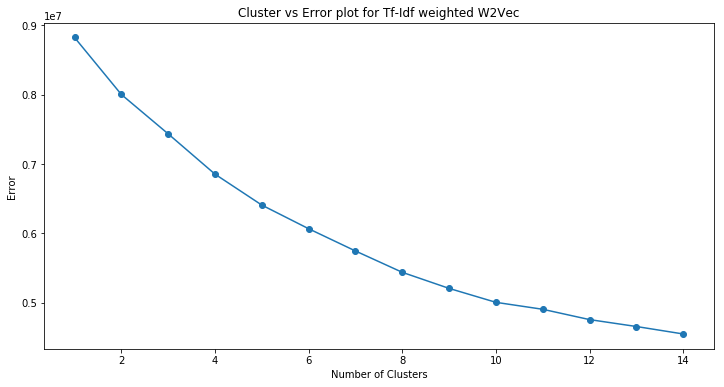

In [68]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df_tfidfw2vec.num_clusters, clusters_df_tfidfw2vec.cluster_errors, marker = "o" )
plt.title('Cluster vs Error plot for Tf-Idf weighted W2Vec')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')

# From the above plot we can see that until cluster 5 the rate of reduction in errors is quite high, whereas after the 5th cluster the rate of error reduction reduced significantly for the 100000 reviews which we have taken. Thus we can say from the plot that we get 5 as the optimum number of clusters for our review data using Tf-Idf W2Vec representation of the text data.

# We have found 5 to be the optimum number of clusters, we will apply kmeans w/ 5 as the number of clusters to get further insights.

In [65]:
# Applying the Kmeans w/ 5 clusters to the tf-idf representation of the text data

clusters_tfidfw2vec = KMeans(5)
clusters_tfidfw2vec.fit( data_tfidf )

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
text_sample['Cluster_Id_tfidfw2vec'] = clusters_avgw2vec.labels_

In [67]:
text_sample.head()

,Text,Cleaned_Text,Cluster_Id,Cluster_Id_tfidfw2vec
0,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...,4,4
1,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...,1,1
2,I got a wild hair for taffy and ordered this f...,b'got wild hair taffi order five pound bag taf...,4,4
3,good flavor! these came securely packed... the...,b'good flavor came secur pack fresh delici lov...,2,2
4,I love eating them and they are good for watch...,b'love eat good watch look movi sweet like tra...,2,2


In [69]:
# We will look at the different reviews in the different clusters 

df_0_tfidfw2vec = text_sample.loc[text_sample['Cluster_Id_tfidfw2vec'] == 0]
df_0_tfidfw2vec['Text'].head(15)

16     I have a 4 year old male cat who has chronic u...
17     My holistic vet recommended this, along with a...
18     Our cats thrive extremely well on this dry cat...
37     Too much of a good thing? We worked this kibbl...
38     As with canidae, Felidae has also changed thei...
46     Five minutes in, one tentacle was bitten off, ...
51     A great healthy chew for my 9 wk old beagle, R...
60     I love, love, love the idea of this product an...
130    My father could no longer take care of his bel...
131    I tired many different dog foods over the 3 yr...
132    I bought this for my one year old Cocker. Howe...
146    My daughter had extensive food allergies as an...
152    I like the Earth's Best baby food line because...
153    I have twin girls, they both loved the Vegetab...
156    For whatever reason, our son really likes this...
Name: Text, dtype: object

In [70]:
df_1_tfidfw2vec = text_sample.loc[text_sample['Cluster_Id_tfidfw2vec'] == 1]
df_1_tfidfw2vec['Text'].head(15)

1     If you are looking for the secret ingredient i...
7     McCann's Instant Irish Oatmeal, Variety Pack o...
8     What else do you need to know? Oatmeal, instan...
19    I've been a fan of Hot & Spicy Maruchan Ramen ...
25    Used this in Moroccan recipes, as a syrup in a...
27    I used to love these growing up and stopped dr...
29    This is not as good as the Frozen Lemon juice,...
30    Couldn't believe it when told how relaxing thi...
31    This  is great stuff.  Made some really tasty ...
32    Tastes great, and gives me energy without the ...
33    Pros:<br />+packaging, shipping, price<br />+s...
40    I've tried a variety of Ahmad tea. Not because...
41    I think I have tried just about every Bloody M...
43    The taste of these white cheddar flat breads i...
48    Yes, it's probably healthier than 5-Hour Energ...
Name: Text, dtype: object

In [71]:
df_2_tfidfw2vec = text_sample.loc[text_sample['Cluster_Id_tfidfw2vec'] == 2]
df_2_tfidfw2vec['Text'].head(15)

3     good flavor! these came securely packed... the...
4     I love eating them and they are good for watch...
6     I got this for my Mum who is not diabetic but ...
11    These Albanese gummi bears and rings and so on...
12    Grape gummy bears are hard to find in my area....
14    These taste really good. I have been purchasin...
22    If you are looking for a less messy version of...
24    these are the best tasting tuna pack they make...
35    Even with small containers, they don't fill th...
36    To me, these are nothing like the regular Alto...
45    The pork chops from Omaha Steaks were very tas...
49    These Nature Valley Nut Lovers Variety Pack wa...
67    Great if you are cutting back on fat, they do ...
68    Now, I haven't done a side-by-side comparison,...
69    These are my favorite gluten-free dairy-free f...
Name: Text, dtype: object

In [72]:
df_3_tfidfw2vec = text_sample.loc[text_sample['Cluster_Id_tfidfw2vec'] == 3]
df_3_tfidfw2vec['Text'].head(15)

39     I drink this tea plain (without sugar or milk)...
42     I'm trying several of the Wu Yi teas. I like t...
44     Hi, I have to have black tea everyday. I have ...
59     I purchased these coffee mate singles to use a...
64     This is one of the best mint chocolate syrup I...
82     Just got this order and it is ok. A bit light ...
122    This is the most delicious soy sauce I have ev...
123    Of all the coffee's available for Tassimo this...
137    This tea has surpassed all other breakfast tea...
138    It always amazes me that there are not dozens ...
164    I live in the dorms without a kitchen so makin...
181    I love this tea!! It is so flavorful yet there...
199    Expensive, but worth it, and Ive tried every I...
225    This tea is so helpful for congestion and it t...
238    If you like jasmine tea, This is a great tea! ...
Name: Text, dtype: object

In [73]:
df_4_tfidfw2vec = text_sample.loc[text_sample['Cluster_Id_tfidfw2vec'] == 4]
df_4_tfidfw2vec['Text'].head(15)

0     Product arrived labeled as Jumbo Salted Peanut...
2     I got a wild hair for taffy and ordered this f...
5     I can remember buying this candy as a kid and ...
9     I have McCann's Oatmeal every morning and by o...
10    This bag of candy online is pretty expensive, ...
13    It is okay.  I would not go out of my way to b...
15    In the 1980s I spent several summers in Italy....
20    Got these on sale for roughly 25 cents per cup...
21    Delicious. I cannot get Australian ginger wher...
23    This is one of the best salsas that I have fou...
26    The item over all was fine, but the Banana Hea...
28    One of the best lemon juice that I have tried....
34    This is a huge supply of them. I'm still worki...
47    I felt energized within five minutes, but it l...
52    Great service! Items arrived faster than expec...
Name: Text, dtype: object